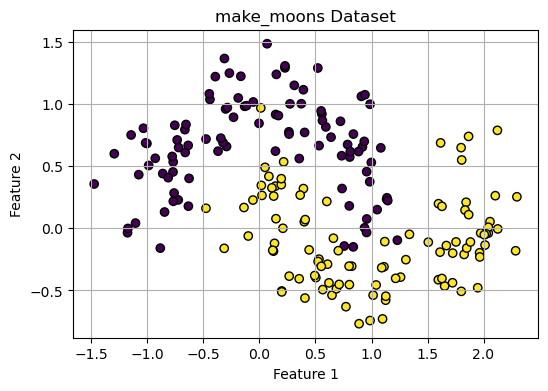

In [2]:
import numpy as np
import matplotlib.pyplot as plt# Generate make_moons dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Visualize it
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title("make_moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [3]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# Train SVM with a given kernel
def train_svm(kernel, X_train, X_test, y_train, y_test, **kwargs):
    model = SVC(kernel=kernel, **kwargs)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{kernel.upper()} kernel - Accuracy: {acc:.2f}")
    return model


In [5]:
# Plot decision boundary
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()


LINEAR kernel - Accuracy: 0.83


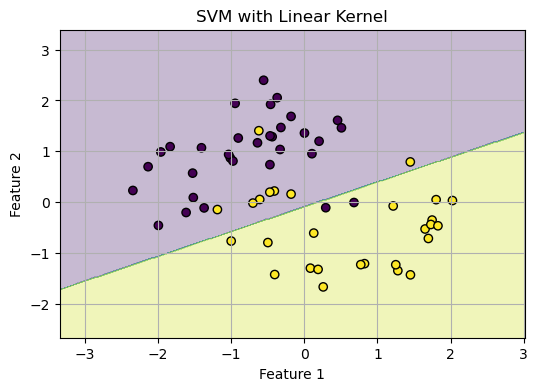

In [6]:
model_linear = train_svm('linear', X_train_scaled, X_test_scaled, y_train, y_test)
plot_decision_boundary(model_linear, X_test_scaled, y_test, "SVM with Linear Kernel")


POLY kernel - Accuracy: 0.88


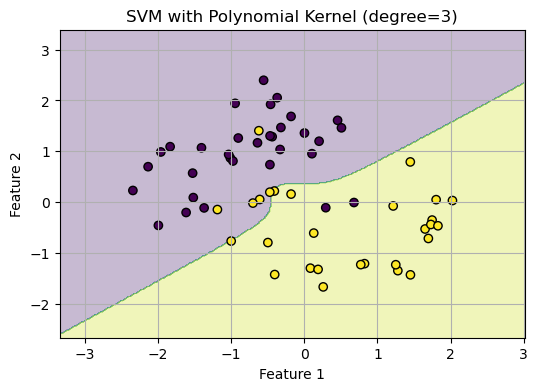

In [7]:
model_poly = train_svm('poly', X_train_scaled, X_test_scaled, y_train, y_test, degree=3)
plot_decision_boundary(model_poly, X_test_scaled, y_test, "SVM with Polynomial Kernel (degree=3)")


RBF kernel - Accuracy: 0.98


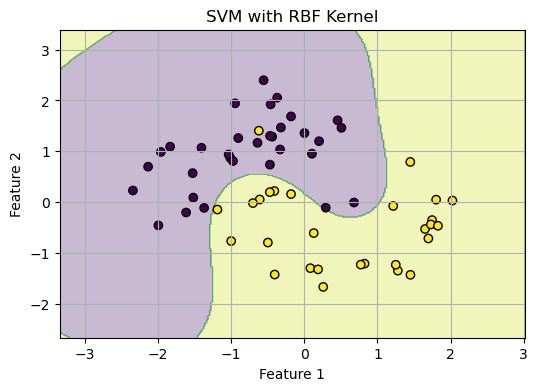

In [8]:
model_rbf = train_svm('rbf', X_train_scaled, X_test_scaled, y_train, y_test)
plot_decision_boundary(model_rbf, X_test_scaled, y_test, "SVM with RBF Kernel")


SIGMOID kernel - Accuracy: 0.70


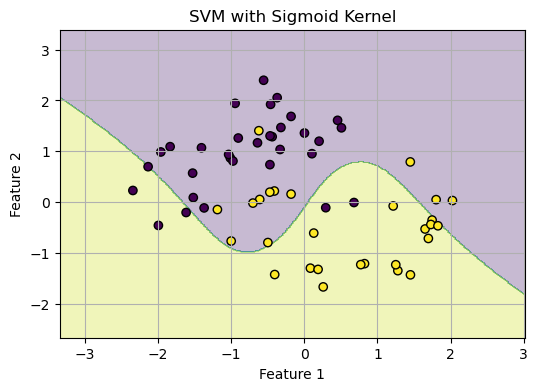

In [14]:
model_sigmoid = train_svm('sigmoid', X_train_scaled, X_test_scaled, y_train, y_test)
plot_decision_boundary(model_sigmoid, X_test_scaled, y_test, "SVM with Sigmoid Kernel")


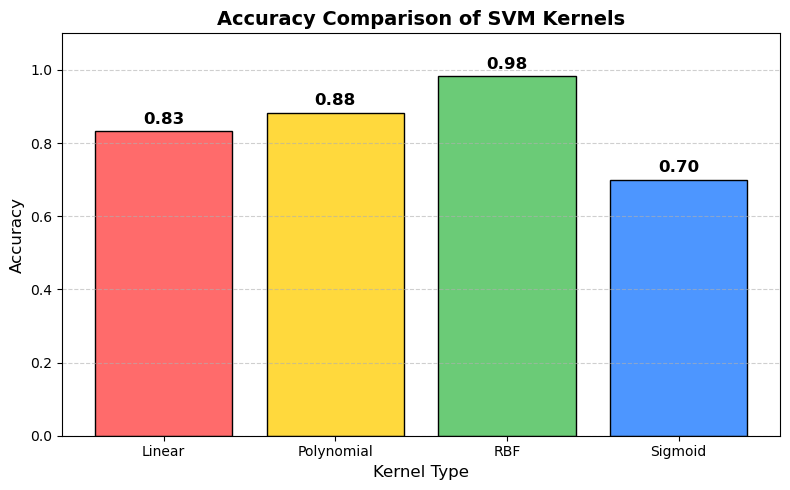

In [13]:
# Colorful and labeled accuracy bar chart
import seaborn as sns

plt.figure(figsize=(8, 5))
colors = ['#FF6B6B', '#FFD93D', '#6BCB77', '#4D96FF']  # Custom colors for each bar

kernels = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

bars = plt.bar(kernels, scores, color=colors, edgecolor='black')

# Add value labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f"{yval:.2f}", ha='center', fontsize=12, fontweight='bold')

plt.ylim(0, 1.1)
plt.title("Accuracy Comparison of SVM Kernels", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Kernel Type", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

